# Task 1: 
### Download the dataset from drive link. Use the train and val images for training and validation in an appropriate ratio (e.g., 80% for training and 20 % for validating).

In [22]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

project_dir = r'C:\Users\DELL\All Files\Personal\Machine Learning\Fractal 3\charts\charts'
csv_file = 'train_val.csv'

# load the csv file
df = pd.read_csv(f'{project_dir}\\{csv_file}')
df['image_index']=df['image_index'].astype(str)
df['image_index']=df['image_index'].apply(lambda x:x+'.png')
# define the path to the image folders
train_path = r'C:\Users\DELL\All Files\Personal\Machine Learning\Fractal 3\charts\charts\train_val'
test_path = r'C:\Users\DELL\All Files\Personal\Machine Learning\Fractal 3\charts\charts\test'

# split the data into training and validation sets
train_df = df.sample(frac=0.8,random_state=42)
val_df = df.drop(train_df.index)

# create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=train_path,
        x_col="image_index",
        y_col="type",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=train_path,
        x_col="image_index",
        y_col="type",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 800 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.


# Task 2:
### Implement a two-layer Convolutional Neural Network, and calculate accuracy, and loss and plot the obtained loss.

C:\Users\DELL\AppData\Local\Temp\ipykernel_1584\919783486.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
25/25 [==============================] - 26s 1s/step - loss: 2.9216 - accuracy: 0.4575 - val_loss: 0.4904 - val_accuracy: 0.7150
Epoch 2/10
25/25 [==============================] - 20s 780ms/step - loss: 0.3426 - accuracy: 0.8550 - val_loss: 0.3317 - val_accuracy: 0.9050
Epoch 3/10
25/25 [==============================] - 20s 797ms/step - loss: 0.1765 - accuracy: 0.9287 - val_loss: 0.2658 - val_accuracy: 0.9300
Epoch 4/10
25/25 [==============================] - 20s 813ms/step - loss: 0.1062 - accuracy: 0.9725 - val_loss: 0.2368 - val_accuracy: 0.9500
Epoch 5/10
25/25 [==============================] - 20s 787ms/step - loss: 0.1345 - accuracy: 0.9638 - val_loss: 0.2848 - val_accuracy: 0.9450
Epoch 6/10
25/25 [==============================] - 20s 797ms/step - loss: 0.0616 - accuracy: 0.9837 - val_loss: 0.3021 - val_accuracy: 0.9450
Epoch 7/10
25/25 [==============================] - 20s 796ms/step - loss: 0.0209 - accuracy: 0.9962 - val_loss: 0.3080 - val_accuracy: 0.9500
Ep

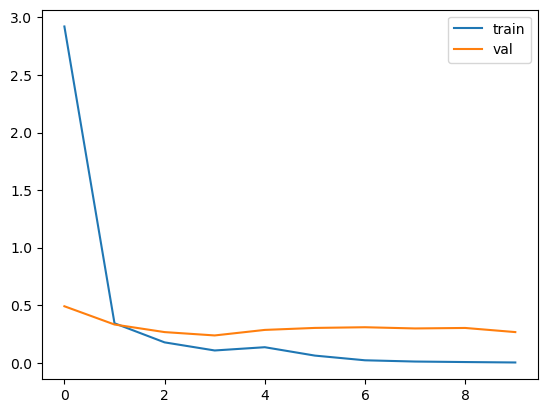

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=val_generator,
        validation_steps=len(val_generator))

# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()


# Task 3: 
### Finetune a pretrained network (e.g., AlexNet) for this task.

94765736/94765736 [==============================] - 56s 1us/step


Epoch 1/10
25/25 [==============================] - 60s 2s/step - loss: 5.9760 - accuracy: 0.4762 - val_loss: 0.4817 - val_accuracy: 0.9150
Epoch 2/10
25/25 [==============================] - 64s 3s/step - loss: 0.4981 - accuracy: 0.7962 - val_loss: 0.3143 - val_accuracy: 0.8650
Epoch 3/10
25/25 [==============================] - 63s 3s/step - loss: 0.2801 - accuracy: 0.9087 - val_loss: 0.1999 - val_accuracy: 0.9450
Epoch 4/10
25/25 [==============================] - 64s 3s/step - loss: 0.2368 - accuracy: 0.9225 - val_loss: 0.2600 - val_accuracy: 0.9050
Epoch 5/10
25/25 [==============================] - 82s 3s/step - loss: 0.2072 - accuracy: 0.9463 - val_loss: 0.1269 - val_accuracy: 0.9900
Epoch 6/10
25/25 [==============================] - 66s 3s/step - loss: 0.1389 - accuracy: 0.9712 - val_loss: 0.0965 - val_accuracy: 0.9900
Epoch 7/10
25/25 [==============================] - 63s 3s/step - loss: 0.1530 - accuracy: 0.9550 - val_loss: 0.1078 - val_accuracy: 0.9800
Epoch 8/10
25/25 [==

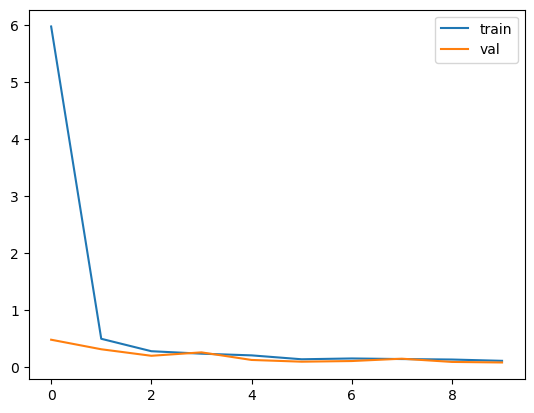

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam

# load the pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# add our own classifier on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

# freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# train the model
history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=val_generator,
        validation_steps=len(val_generator))

# plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

#### Note: The observations and reports are written and uploaded in pdf file in GC.